In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 로이터 기사 데이터 셋을 로딩합니다.

from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([value,key] for (key,value) in word_index.items())

decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
# 데이터의 준비
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,p in enumerate(sequences):
        results[i,p] = 1
    return results

In [12]:
# 데이터의 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [14]:
# 라벨 데이터의 인코딩
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))

    for i, seq in enumerate(labels):
        results[i,seq] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
# categorical 데이터로 변환
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
# 신경망을 구성

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# 훈련,검증 데이터 분리
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.6535 - accuracy: 0.5115 - val_loss: 1.7627 - val_accuracy: 0.6380
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.4342 - accuracy: 0.7067 - val_loss: 1.3376 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0630 - accuracy: 0.7736 - val_loss: 1.1608 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8434 - accuracy: 0.8176 - val_loss: 1.0593 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6725 - accuracy: 0.8583 - val_loss: 0.9819 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5399 - accuracy: 0.8896 - val_loss: 0.9449 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4378 - accuracy: 0.9107 - val_loss: 0.9168 - val_accuracy: 0.8080
Epoch 8/20
16

In [23]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1,len(loss)+1)

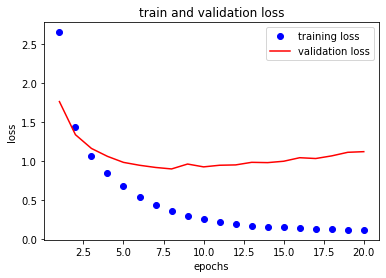

In [24]:
# 결과의 시각화
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'r-',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('train and validation loss')
plt.legend()
plt.show()

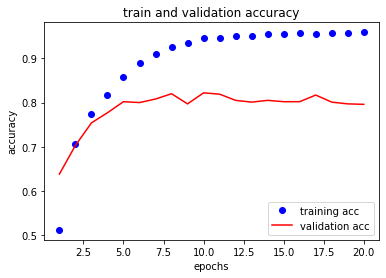

In [25]:
# 결과의 시각화
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'r-',label='validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('train and validation accuracy')
plt.legend()
plt.show()

In [27]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
# 중간 은닉층의 유닛수를 4로 줄여봄

In [28]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
# 결과가 훨씬 안좋게 나옴

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 3.5896 - accuracy: 0.0140 - val_loss: 3.3472 - val_accuracy: 0.0240
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 3.1796 - accuracy: 0.0955 - val_loss: 3.0156 - val_accuracy: 0.1990
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 2.8223 - accuracy: 0.2479 - val_loss: 2.6881 - val_accuracy: 0.2500
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 2.4665 - accuracy: 0.3889 - val_loss: 2.3522 - val_accuracy: 0.5500
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 2.1399 - accuracy: 0.5609 - val_loss: 2.0837 - val_accuracy: 0.5580
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 1.8969 - accuracy: 0.5668 - val_loss: 1.9034 - val_accuracy: 0.5640
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 1.7464 - accuracy: 0.5745 - val_loss: 1.8076 - val_accuracy: 0.5610
Epoch 8/20
16

In [30]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))             

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 2.1529 - accuracy: 0.5014 - val_loss: 1.4600 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.2218 - accuracy: 0.7150 - val_loss: 1.1738 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 0.9090 - accuracy: 0.7899 - val_loss: 1.0329 - val_accuracy: 0.7780
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6944 - accuracy: 0.8373 - val_loss: 0.9518 - val_accuracy: 0.7930
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5158 - accuracy: 0.8787 - val_loss: 0.9406 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.4046 - accuracy: 0.9008 - val_loss: 0.9932 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.2986 - accuracy: 0.9277 - val_loss: 0.9886 - val_accuracy: 0.8000
Epoch 8/20
16